In [1]:
#SIZE_TEST = 50000
N_SENTENCES_TRAIN = 25000
N_SENTENCES_TEST = 1000
N_EPOCHS = 2
CACHED = True

In [2]:
import sys
sys.path.append('../src')

In [3]:
import numpy as np

# Creates Dataset

In [4]:
# Creates Arithmetic dataset
import dataset
reload(dataset)

data_obj = dataset.Arithmetic()
data_obj.create(n_sentences_train=N_SENTENCES_TRAIN, n_sentences_test=N_SENTENCES_TEST, cfactor=.25)

Using TensorFlow backend.


Generating raw text, with training size: 25000 and testing size 1000
Generated train sequence - 1102762 characters
Generated test sequence - 43734 characters
Total vocabulary size:  17
Total Patterns:  1102727
Total Patterns:  43699


In [5]:
print data_obj.train['X'].shape
print data_obj.train['y'].shape
print len(data_obj.train_raw)
print ''
print data_obj.test['X'].shape
print data_obj.test['y'].shape
print len(data_obj.test_raw)
print data_obj.test_raw[:50]

(1102727, 35, 17)
(1102727, 17)
1102762

(43699, 35, 17)
(43699, 17)
43734
['(', '6', '+', '9', '+', '6', '-', '(', '1', ')', '*', '3', ')', '/', '(', '2', '*', '9', '-', '5', '+', '2', '+', '7', '/', '3', '/', '5', '+', '6', '+', '4', '-', '(', '7', ')', '*', '1', '-', '6', '*', '9', '-', '(', '9', ')', '*', '4', '+', '3']


# Creates and trains character model

In [6]:
import model
reload(model)

nn_model = model.VanillaLSTM(data_obj, 128, n_epochs=1)
nn_model.build()

if CACHED:
    nn_model.load_from_file('../models/arithmetic_1')
else:
    for i in range(N_EPOCHS):
        nn_model.train()
        nn_model.save('../models/arithmetic_' + str(i))

Epoch 1/1
1102727/1102727 [==============================] - 1147s - loss: 1.9291 - acc: 0.2889  
('Saved model to file:', '../models/arithmetic_0')
Epoch 1/1
1102727/1102727 [==============================] - 1102s - loss: 1.8712 - acc: 0.3019  
('Saved model to file:', '../models/arithmetic_1')


In [7]:
# Creates a sentence
nn_model.complete_sentence(50)

Dimensions: (1, 35, 17)
[ 8  2 16  6  0 13  1  3 16  5  0 11  6  9  3 11  5 16  6  8  2  0  7  1  2
 14  6  9  2 12  5  8  1  3  0  0  1  6  0  5  0  5  0  5  0  3  0  3  0  3
  0  3  0  3  0  3  0  3  0  3  0  3  0  3  0  3  0  3  0  3  0  3  0  3  0
  3  0  3  0  3  0  3  0  3  0]


'1*9/(6)+9-(4/2+4-9/1*(0)*7/2*5-1)+(()/(-(-(-(+(+(+(+(+(+(+(+(+(+(+(+(+(+(+(+(+(+(+(+('

# Extracts States

In [8]:
# Gets hidden states
states = nn_model.extract_states()
print states.shape

(43734, 32)


# Creates Features

In [9]:
import features
reload(features)

features_obj = features.GrammarFeature(data_obj)
features_obj.build_feature_functions()
computed_features = features_obj.compute_feat_matrix()

print computed_features['feat_matrix'].shape
computed_features

Parsed 0 symbols out of 43734
Stack size: 0
Parsed 1000 symbols out of 43734
Stack size: 5
Parsed 2000 symbols out of 43734
Stack size: 3
Parsed 3000 symbols out of 43734
Stack size: 3
Parsed 4000 symbols out of 43734
Stack size: 3
Parsed 5000 symbols out of 43734
Stack size: 9
Parsed 6000 symbols out of 43734
Stack size: 5
Parsed 7000 symbols out of 43734
Stack size: 3
Parsed 8000 symbols out of 43734
Stack size: 3
Parsed 9000 symbols out of 43734
Stack size: 3
Parsed 10000 symbols out of 43734
Stack size: 3
Parsed 11000 symbols out of 43734
Stack size: 7
Parsed 12000 symbols out of 43734
Stack size: 3
Parsed 13000 symbols out of 43734
Stack size: 5
Parsed 14000 symbols out of 43734
Stack size: 1
Parsed 15000 symbols out of 43734
Stack size: 3
Parsed 16000 symbols out of 43734
Stack size: 3
Parsed 17000 symbols out of 43734
Stack size: 3
Parsed 18000 symbols out of 43734
Stack size: 7
Parsed 19000 symbols out of 43734
Stack size: 5
Parsed 20000 symbols out of 43734
Stack size: 5
Parse

{'feat_matrix': array([[ True, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        ..., 
        [ True, False,  True, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        [ True,  True, False, ..., False, False, False]], dtype=bool),
 'labels': ['SENTENCE_1',
  'EXPR_0',
  'EXPR_1',
  'EXPR_2',
  'EXPR_3',
  'EXPR_4',
  'MIN_0',
  'MIN_1',
  'MIN_2',
  'MIN_3',
  'MIN_4',
  'N_0',
  'N_1',
  'ADD_0',
  'ADD_1',
  'ADD_2',
  'ADD_3',
  'ADD_4',
  'PAREN_0',
  'PAREN_1',
  'PAREN_2',
  'PAREN_3',
  'PAREN_4',
  'MUL_0',
  'MUL_1',
  'MUL_2',
  'MUL_3',
  'MUL_4',
  'DIV_0',
  'DIV_1',
  'DIV_2',
  'DIV_3',
  'DIV_4',
  'DATASET_1',
  'DATASET_2',
  'DATASET_3',
  'DATASET_4']}

# Computes scores

In [10]:
import score

score_obj = score.MultiNeuronPred(states, 
                computed_features['feat_matrix'],
                computed_features['labels'])
score_obj.compute_scores()

Scoring feature 0 out of 37
Feature: SENTENCE_1
Fitting model
Cant compute score
Feature: EXPR_0
Fitting model
Computing score
Accuracy: 0.992179863148
Feature: EXPR_1
Fitting model
Computing score
Accuracy: 0.076161710407
Feature: EXPR_2
Fitting model
Computing score
Accuracy: 0.0912766740078
Feature: EXPR_3
Fitting model
Computing score
Accuracy: 0.105718379625
Feature: EXPR_4
Fitting model
Computing score
Accuracy: 0.119531468537
Feature: MIN_0
Fitting model
Computing score
Accuracy: 0.333717551993
Feature: MIN_1
Fitting model
Computing score
Accuracy: 0.347672060323
Feature: MIN_2
Fitting model
Computing score
Accuracy: 0.322687013798
Feature: MIN_3
Fitting model
Computing score
Accuracy: 0.251223777676
Scoring feature 10 out of 37
Feature: MIN_4
Fitting model
Computing score
Accuracy: 0.170552143649
Feature: N_0
Fitting model
Computing score
Accuracy: 0.999871547848
Feature: N_1
Fitting model
Computing score
Accuracy: 0.999787666454
Feature: ADD_0
Fitting model
Computing score
Acc

/Users/thib/.virtualenvs/keras/lib/python2.7/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/thib/.virtualenvs/keras/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.37037037037
Feature: DATASET_2
Fitting model
Computing score
Accuracy: 0.330687830688
Feature: DATASET_3
Fitting model
Computing score
Accuracy: 0.00109962505131
Feature: DATASET_4
Fitting model
Computing score
Cant compute score


/Users/thib/.virtualenvs/keras/lib/python2.7/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Filtering feature matrix


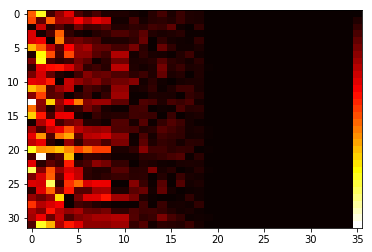

0 SENTENCE_1
1 EXPR_0
2 EXPR_1
3 EXPR_2
4 EXPR_3
5 EXPR_4
6 MIN_0
7 MIN_1
8 MIN_2
9 MIN_3
10 MIN_4
11 N_0
12 N_1
13 ADD_0
14 ADD_1
15 ADD_2
16 ADD_3
17 ADD_4
18 PAREN_0
19 PAREN_1
20 PAREN_2
21 PAREN_3
22 PAREN_4
23 MUL_0
24 MUL_1
25 MUL_2
26 MUL_3
27 MUL_4
28 DIV_0
29 DIV_1
30 DIV_2
31 DIV_3
32 DIV_4
33 DATASET_1
34 DATASET_2


In [11]:
%matplotlib inline

N_FEATURES_TO_PLOT = 35

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import os
import numpy as np

to_plot = score_obj.filter_scores(N_FEATURES_TO_PLOT)

n_values   = to_plot.shape[0]
dummy_vals = np.linspace(0,np.max(to_plot),num=n_values)
dummy_vals = np.expand_dims(dummy_vals, axis=1)
to_plot  = np.append(to_plot, dummy_vals, axis = 1)

plt.imshow(to_plot, cmap='hot',
                      norm=Normalize(vmin=0),
                      interpolation='nearest',
                      aspect='auto')
plt.show()
#plt.savefig('correlation_matrix.pdf',  bbox_inches='tight')

for i,l in enumerate(computed_features['labels'][:N_FEATURES_TO_PLOT]):
    print i,l

Filtering feature matrix


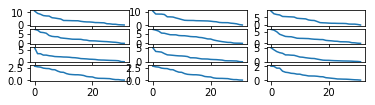

In [12]:
# Second viz
to_plot = score_obj.filter_scores(N_FEATURES_TO_PLOT)

if to_plot.shape[1] <= 4:
    ncol = 1
elif 4 < to_plot.shape[1] <= 8:
    ncol = 2
else:
    nplots = min(12, to_plot.shape[1])
    to_plot = to_plot[:,:nplots]
    ncol = 3

for i in range(to_plot.shape[1]):
    neuron_series = np.sort(to_plot[:,i])[::-1]
    plt.subplot(to_plot.shape[1],ncol,i+1)
    plt.plot(neuron_series)

plt.show()
#plt.savefig('individual_correlation_scores.pdf',  bbox_inches='tight')

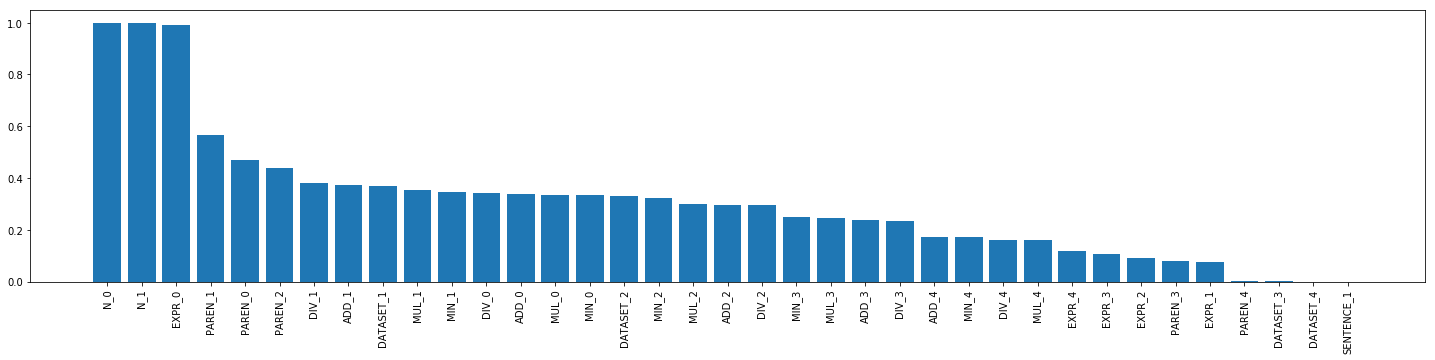

In [13]:
# Third viz: shows score per rule
fig_size = [25,5]
plt.rcParams["figure.figsize"] = fig_size

feat_scores = score_obj.model_scores
feat_names =  computed_features['labels']

dorder = np.argsort(feat_scores)[::-1][:50]

scores = np.array(feat_scores)[dorder]
names = np.array(feat_names)[dorder]

fig, ax = plt.subplots()
plt.bar(np.arange(dorder.shape[0]), scores)
plt.xticks(np.arange(dorder.shape[0]), names, rotation='vertical')

plt.show()
# print feat_names[order]